In [4]:
import pandas
import os
from sklearn import metrics
import plotnine
import numpy

In [5]:
def summary(table, label=[1,0]):

    score = table['score']
    prediction = table['prediction']# .replace({'lower':0, "higher":1})
    target = table['target']#.replace({'lower':0, "higher":1})
    mat = metrics.confusion_matrix(y_true=target, y_pred=prediction, labels=label)
    auc = metrics.roc_auc_score(y_score=score, y_true=target)
    tpr = mat[0,0] / sum(mat[0,:])
    tnr = mat[1,1] / sum(mat[1,:])
    ppv = mat[0,0] / sum(mat[:,0])
    npv = mat[1,1] / sum(mat[:,1])
    acc = numpy.diag(mat).sum() / mat.sum()
    output = {
        "matrix":numpy.round(mat,3),
        "acc":numpy.round(acc,3),
        "auc":numpy.round(auc,3),
        "tpr":numpy.round(tpr,3),
        "tnr":numpy.round(tnr,3),
        "ppv":numpy.round(ppv,3),
        "npv":numpy.round(npv,3)
    }
    return(output)

In [7]:
##  Ensemble
folder = '../LOG'
link = [
    "VARIABLE/better/validation.csv",
    "IMAGE (VGG)/better/validation.csv",
    'IMAGE (RESNET)/better/validation.csv', 
    'IMAGE (DENSENET)/better/validation.csv', 
    'IMAGE AND VARIABLE (VGG)/better/validation.csv',
    'IMAGE AND VARIABLE (RESNET)/better/validation.csv', 
    'IMAGE AND VARIABLE (DENSENET)/better/validation.csv',
    "IMAGE AND VARIABLE (PRODUCT)/better/validation.csv",
    "BINARY VARIABLE/better/validation.csv",
    'BINARY IMAGE AND VARIABLE (VGG)/better/validation.csv',
    'BINARY IMAGE AND VARIABLE (RESNET)/better/validation.csv', 
    'BINARY IMAGE AND VARIABLE (DENSENET)/better/validation.csv'
]
for i, j in enumerate(link, 1):

    item = pandas.read_csv(os.path.join(folder, j))
    if(i==1):

        score = item['score']
        target = item['target']
        pass

    else:

        score += item['score']
        pass
    
    pass

score = score / i
prediction = 1 * (score > 0.5)
data = pandas.DataFrame({"score":score, "prediction":prediction, "target":target})
evaluation = summary(table=data, label=[1,0])
pass

ensemble = data.copy()
os.makedirs(os.path.join(folder, 'ENSEMBLE'), exist_ok=True)
ensemble.to_csv(os.path.join(folder, 'ENSEMBLE', 'validation.csv'), index=False)
pass

with open(os.path.join(folder, 'ENSEMBLE', 'evaluation.txt'), 'wt') as paper:

    _ = paper.write(str(evaluation))
    pass

#  全部放一起比較。

/home/ubuntu/Softwares/miniconda/envs/web/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/ubuntu/Softwares/miniconda/envs/web/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ../LOG/gamma.png


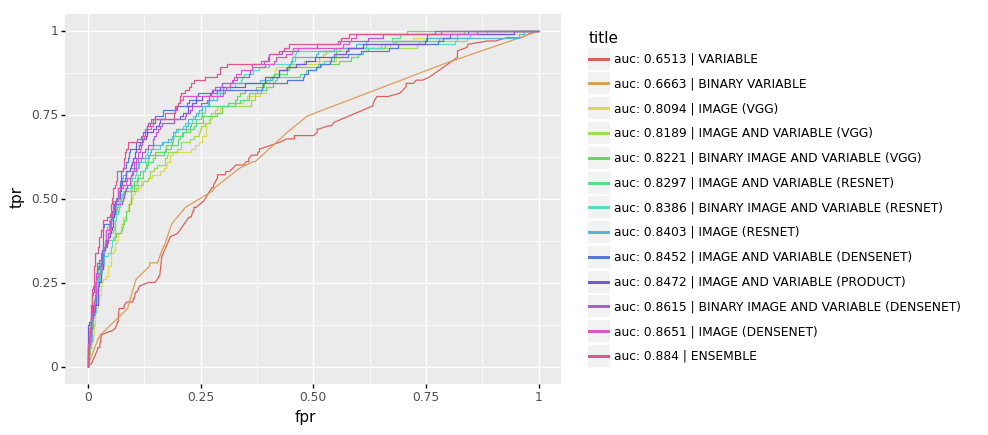

<ggplot: (8781621597853)>

In [8]:
##  使用變數以及圖片。
folder = '../LOG'
link = [
    "VARIABLE/better/validation.csv",
    "IMAGE (VGG)/better/validation.csv",
    'IMAGE (RESNET)/better/validation.csv', 
    'IMAGE (DENSENET)/better/validation.csv', 
    'IMAGE AND VARIABLE (VGG)/better/validation.csv',
    'IMAGE AND VARIABLE (RESNET)/better/validation.csv', 
    'IMAGE AND VARIABLE (DENSENET)/better/validation.csv',
    "IMAGE AND VARIABLE (PRODUCT)/better/validation.csv",
    "BINARY VARIABLE/better/validation.csv",
    'BINARY IMAGE AND VARIABLE (VGG)/better/validation.csv',
    'BINARY IMAGE AND VARIABLE (RESNET)/better/validation.csv', 
    'BINARY IMAGE AND VARIABLE (DENSENET)/better/validation.csv',
    "ENSEMBLE/validation.csv"    
]
group = []
for i in link:

    item = pandas.read_csv(os.path.join(folder, i))
    fpr, tpr, threshold = metrics.roc_curve(y_true=item['target'], y_score=item['score'])
    auc = metrics.auc(fpr, tpr)
    title = "auc: {}".format(round(auc, 4)) + " | " + i.split("/")[0]
    group += [pandas.DataFrame({"fpr":fpr, "tpr":tpr, "threshold":threshold, "auc":auc, "title":title})]
    pass

data = pandas.concat(group, axis=0)
paper = plotnine.ggplot()
paper = paper + plotnine.geom_line(plotnine.aes(x=data['fpr'], y=data['tpr'], colour=data['title']), linetype='solid') 
plotnine.ggsave(plot = paper, filename = "gamma.png", path = folder)
paper

---